In [5]:
import numpy as np
import cv2
import imageio.v2 as imageio
import matplotlib.pyplot as plt

In [7]:
dataSetPath = "/home/asif/DBMS-II/SkinDetection/ibtd"
n = 256
skinPixel = np.zeros(shape=(n, n, n))
nonSkinPixel = np.zeros(shape=(n, n, n))
skinPixelSum = 0
nonSkinPixelSum = 0
skinProbability = np.zeros(shape=(n, n, n))
nonSkinProbability = np.zeros(shape=(n, n, n))
learning_ratio = np.zeros(shape=(n, n, n)) 

In [4]:
total_images = 555
indices = ["%04d" % x for x in range(1000)]

In [8]:
for index in range(total_images):
    mask_image = cv2.imread("/home/asif/DBMS-II/SkinDetection/ibtd/Mask/"+str(indices[index])+".bmp")
    unmask_image = cv2.imread("/home/asif/DBMS-II/SkinDetection/ibtd/"+str(indices[index])+".jpg")

    height, width, channel = mask_image.shape

    for x in range(height):
        for y in range(width):
            blue = mask_image[x, y, 0]
            green = mask_image[x, y, 1]
            red = mask_image[x, y, 2]

            if (blue > 250 and green > 250 and red > 250):  
                blue = unmask_image[x, y, 0]
                green = unmask_image[x, y, 1]
                red = unmask_image[x, y, 2]

                nonSkinPixel[red, green, blue] += 1
                nonSkinPixelSum += 1
            else:
                skinPixel[red, green, blue] += 1
                skinPixelSum += 1

    print("Image ", index, " - DONE!")


Image  0  - DONE!
Image  1  - DONE!
Image  2  - DONE!
Image  3  - DONE!
Image  4  - DONE!
Image  5  - DONE!
Image  6  - DONE!
Image  7  - DONE!
Image  8  - DONE!
Image  9  - DONE!
Image  10  - DONE!
Image  11  - DONE!
Image  12  - DONE!
Image  13  - DONE!
Image  14  - DONE!
Image  15  - DONE!
Image  16  - DONE!
Image  17  - DONE!
Image  18  - DONE!
Image  19  - DONE!
Image  20  - DONE!
Image  21  - DONE!
Image  22  - DONE!
Image  23  - DONE!
Image  24  - DONE!
Image  25  - DONE!
Image  26  - DONE!
Image  27  - DONE!
Image  28  - DONE!
Image  29  - DONE!
Image  30  - DONE!
Image  31  - DONE!
Image  32  - DONE!
Image  33  - DONE!
Image  34  - DONE!
Image  35  - DONE!
Image  36  - DONE!
Image  37  - DONE!
Image  38  - DONE!
Image  39  - DONE!
Image  40  - DONE!
Image  41  - DONE!
Image  42  - DONE!
Image  43  - DONE!
Image  44  - DONE!
Image  45  - DONE!
Image  46  - DONE!
Image  47  - DONE!
Image  48  - DONE!
Image  49  - DONE!
Image  50  - DONE!
Image  51  - DONE!
Image  52  - DONE!
Ima

In [9]:
fp = open('/home/asif/DBMS-II/SkinDetection/learningPorbability.txt', 'w')
for r in range(n):
    for g in range(n):
        for b in range(n):
            skinProbability[r, g, b] = skinPixel[r, g, b]/skinPixelSum
            nonSkinProbability[r, g, b] = nonSkinPixel[r, g, b]/nonSkinPixelSum

            if (nonSkinPixel[r, g, b] != 0):
                learning_ratio[r, g, b] = skinProbability[r, g, b] / nonSkinProbability[r, g, b]
            else:
                learning_ratio[r, g, b] = 0.0

            tmp = learning_ratio[r, g, b]
            fp.write(f"{tmp}\n")

fp.close()

In [11]:
trained_value = np.zeros(shape=(n, n, n))
fp = open('/home/asif/DBMS-II/SkinDetection/learningPorbability.txt', 'r')

for i in range(256):
    for j in range(256):
        for k in range(256):
            val = fp.readline()
            trained_value[i][j][k] = float(val)

fp.close()

In [19]:
T = 0.4
test_image_path = dataSetPath+"/0000.jpg"
#test_image = cv2.imread(test_image_path)
test_image = imageio.imread(test_image_path)
height, width, channel = test_image.shape 

for x in range(height):
  for y in range(width):
    r=test_image[x][y][0]
    g=test_image[x][y][1]
    b=test_image[x][y][2]

    if abs(learning_ratio[r][g][b])<T:  # or you can use the trained value saved in file
      test_image[x][y][0] = 255
      test_image[x][y][1] = 255
      test_image[x][y][2] = 255

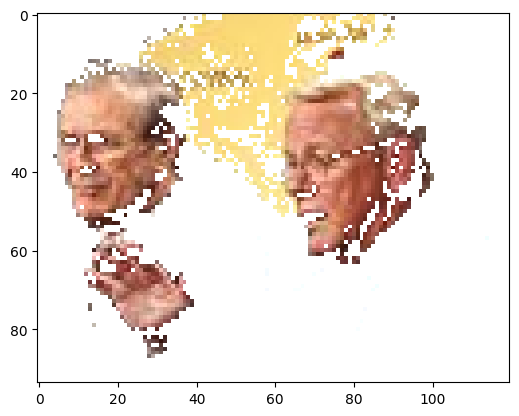

In [20]:
plt.imshow(test_image)